## Probability and Distributions

In [16]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12, 6)
import pandas as pd
import time
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

In [2]:
def throw_a_coin(N):
    return np.random.choice(['H','T'], size=N)
throws=throw_a_coin(40)
print ("Throws:"," ".join(throws))
print ("Number of Heads:", np.sum(throws=='H'))
print ("p1 = Number of Heads/Total Throws:", np.sum(throws=='H')/40.)

Throws: H T T T H T T H H T H H T T H H H H H H H T H H T T T H H H H T T H H T H H T H
Number of Heads: 24
p1 = Number of Heads/Total Throws: 0.6


In [3]:
throws=throw_a_coin(40)
print ("Throws:"," ".join(throws))
print ("Number of Heads:", np.sum(throws=='H'))
print ("p2 = Number of Heads/Total Throws:", np.sum(throws=='H')/40.)

Throws: T H T T T T T H H T T H T T H T H T T H T T H T T T H H T T T T T T T T H T H H
Number of Heads: 13
p2 = Number of Heads/Total Throws: 0.325


In [4]:
throws=throw_a_coin(10000)
print ("First 1000 Throws:"," ".join(throws)[:1000])
print ("Number of Heads:", np.sum(throws=='H'))
print ("p for 10,000 = Number of Heads/Total Throws:", np.sum(throws=='H')/10000.)

First 1000 Throws: T T H H H T H T T H T T T H T T H T T H T T T T T T T T H T H T H H T T T T H H H T H T H H T T H H T H T T H H T T H H T H T H H T T H T H T H T T T T T H T T T T H H T H H H T T H T H T H T H H T T T T T T T T H H T T T T T T H T T H H H T H T T T H H H H T T H T H T T H T H T T H H T T H H T T T T T T T T H T H H H H H H H H T T H H H T T H H T T T H H T T H T H T T T H H T T T T H T H H H H T H T T T H T H H T T H T H T H T T H H T T H T T T T H T T T H T T T H T T T H T T T H H T T T H T H T T H T T H H T T T T H H H H T H H H T T H H H H H H H H T H T H H H T H H T H T H T H H T T H H H T T T T H T H T T H T H T H H T T T T T T T T T H T H H H H H H H T H T H H H T H T T H H T T H H H T H T T H T T T H T H H T T H H H H T T H H T H T H H H T H H T T H H T T T H H T T H H H T T T H T T H H T T T T T H H T T T H H T H H T T H T T T T T T T T H T T H T H T H H T T T T T T H H H H H H H T T H H H T T H H T H H T H H T H T T T T T H T T T H T T H H H T H T H T H T H

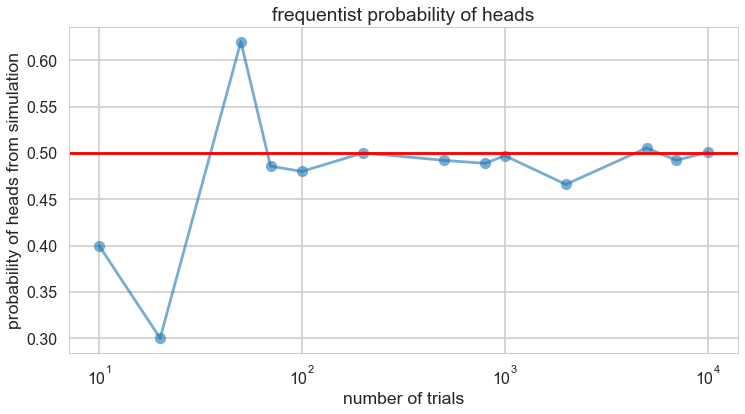

In [17]:
trials=[10, 20, 50, 70, 100, 200, 500, 800, 1000, 2000, 5000, 7000, 10000]
plt.plot(trials, [np.sum(throw_a_coin(j)=='H')/np.float(j) for j in trials], 'o-', alpha=0.6);
plt.xscale("log")
plt.axhline(0.5, 0, 1, color='r');
plt.xlabel('number of trials');
plt.ylabel('probability of heads from simulation');
plt.title('frequentist probability of heads');

### A simple Election Model
In the last section, we made a simple simulation of a coin-toss on the computer from a fair-coin model which associated equal probability with heads and tails. Let us consider another model here, a table of probabilities that PredictWise made on October 2, 2012 for the US presidential elections. PredictWise aggregated polling data and, for each state, estimated the probability that the Obama or Romney would win. Here are those estimated probabilities:

In [6]:
predictwise = pd.read_csv('data\predictwise.csv').set_index('States')
predictwise.head()

,Obama,Romney,Votes
States,,,
Alabama,0.000,1.000,9
Alaska,0.000,1.000,3
Arizona,0.062,0.938,11
Arkansas,0.000,1.000,6
California,1.000,0.000,55


#### Simulating the model
To do this, we will assume that the outcome in each state is the result of an independent coin flip whose probability of coming up Obama is given by the Predictwise state-wise win probabilities. Lets write a function simulate_election that uses this predictive model to simulate the outcome of the election given a table of probabilities.

In the code below, each column simulates a single outcome from the 50 states + DC by choosing a random number between 0 and 1. Obama wins that simulation if the random number is $<$ the win probability. If he wins that simulation, we add in the electoral votes for that state, otherwise we dont. We do this n_sim times and return a list of total Obama electoral votes in each simulation.

In [19]:
def simulate_election(model, n_sim):
    simulations = np.random.uniform(size=(51, n_sim))
    obama_votes = (simulations < model.Obama.values.reshape(-1, 1)) * model.Votes.values.reshape(-1, 1)
    #summing over rows gives the total electoral votes for each simulation
    #reshape transform array's dimensions so you can compare both, -1 is use to let python decide the size necessary \
    #to fit all the values
    return obama_votes.sum(axis=0)

In [45]:
result = simulate_election(predictwise, 10000)
print ((result >= 269).sum())

9964


#### Displaying the prediction
Now, lets visualize the simulation. We will build a histogram from the result of simulate_election. We will normalize the histogram by dividing the frequency of a vote tally by the number of simulations. We'll overplot the "victory threshold" of 269 votes as a vertical black line and the result (Obama winning 332 votes) as a vertical red line.

We also compute the number of votes at the 5th and 95th quantiles, which we call the spread, and display it (this is an estimate of the outcome's uncertainty). By 5th quantile we mean that if we ordered the number of votes Obama gets in each simulation in increasing order, the 5th quantile is the number below which 5\% of the simulations lie.

We also display the probability of an Obama victory

In [46]:
def plot_simulation(simulation):
    plt.hist(simulation, bins=np.arange(200, 538, 1), 
             label='simulations', align='left', normed=True)
    plt.axvline(332, 0, .5, color='r', label='Actual Outcome')
    plt.axvline(269, 0, .5, color='k', label='Victory Threshold')
    p05 = np.percentile(simulation, 5.)
    p95 = np.percentile(simulation, 95.)
    iq = int(p95 - p05)
    pwin = ((simulation >= 269).mean() * 100)
    plt.title("Chance of Obama Victory: %0.2f%%, Spread: %d votes" % (pwin, iq))
    plt.legend(frameon=False, loc='upper left')
    plt.xlabel("Obama Electoral College Votes")
    plt.ylabel("Probability")
    sns.despine()

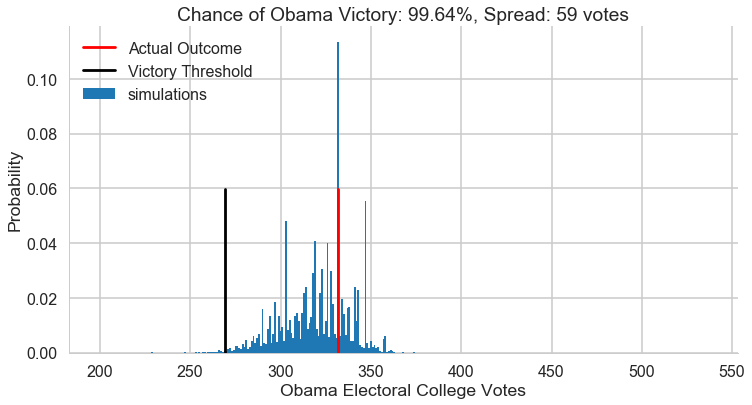

In [47]:
plot_simulation(result)

### Bernoulli Random Variables (in scipy.stats)
Let us engage in some term defining right now. $X$ is a random variable, and when we say $X=x$ we are asking "what if the random variable X takes the value x. $P(X=x)$ asks: what is the probability that the random variable X takes the value x. Finally $p$ is a parameter of the Bernoulli distribution, and as we have seen, one of the things we want to do in data analysis is: having seen some data, what can we infer to be the values of p, so that we can make future predictions for X.

In [11]:
from scipy.stats import bernoulli
#bernoulli random variable
brv=bernoulli(p=0.3)
brv.rvs(size=20)

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1])

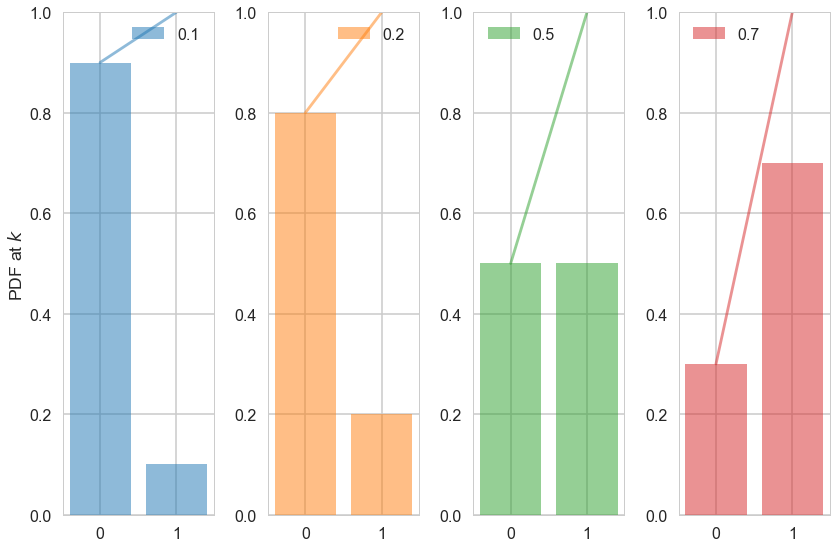

In [51]:
event_space=[0,1]
plt.figure(figsize=(12,8))
colors=sns.color_palette()
for i, p in enumerate([0.1, 0.2, 0.5, 0.7]):
    ax = plt.subplot(1, 4, i+1)
    plt.bar(event_space, bernoulli.pmf(event_space, p), label=p, color=colors[i], alpha=0.5)
    plt.plot(event_space, bernoulli.cdf(event_space, p), color=colors[i], alpha=0.5)

    ax.xaxis.set_ticks(event_space)
   
    plt.ylim((0,1))
    plt.legend(loc=0)
    if i == 0:
        plt.ylabel("PDF at $k$")
plt.tight_layout()


### Uniform Distribution (in numpy)

### Empirical Distribution
**Cumulative Distribution Function**, or CDF (sometimes just called the distribution, as opposed to the density).

In [13]:
CDF = lambda x: np.float(np.sum(result < x))/result.shape[0]
for votes in [200, 300, 320, 340, 360, 400, 500]:
    print ("Obama Win CDF at votes=", votes, " is ", CDF(votes))

Obama Win CDF at votes= 200  is  0.0
Obama Win CDF at votes= 300  is  0.1425
Obama Win CDF at votes= 320  is  0.4436
Obama Win CDF at votes= 340  is  0.8425
Obama Win CDF at votes= 360  is  0.9974
Obama Win CDF at votes= 400  is  1.0
Obama Win CDF at votes= 500  is  1.0


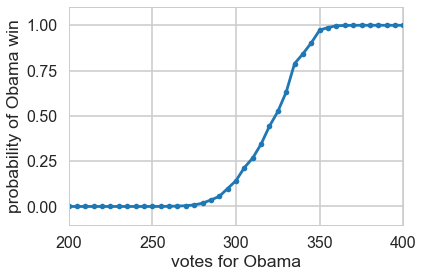

In [14]:
votelist=np.arange(0, 540, 5)
plt.plot(votelist, [CDF(v) for v in votelist], '.-');
plt.xlim([200,400])
plt.ylim([-0.1,1.1])
plt.xlabel("votes for Obama")
plt.ylabel("probability of Obama win");

### Binomial Distribution (in scipy.stats)

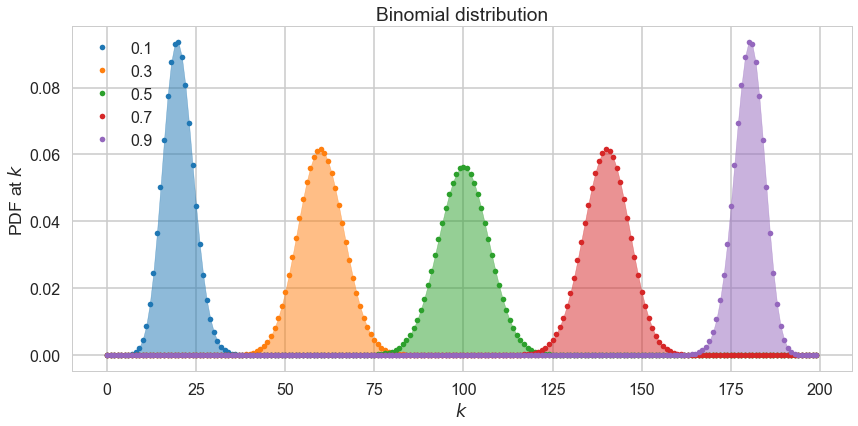

In [52]:
from scipy.stats import binom
#Probability of getting k succesful results when doing n events
plt.figure(figsize=(12,6))
k = np.arange(0, 200)
for p, color in zip([0.1, 0.3, 0.5, 0.7, 0.9], colors):
    rv = binom(200, p)
    plt.plot(k, rv.pmf(k), '.', lw=2, color=color, label=p)
    plt.fill_between(k, rv.pmf(k), color=color, alpha=0.5)
q=plt.legend()
plt.title("Binomial distribution")
plt.tight_layout()
q=plt.ylabel("PDF at $k$")
q=plt.xlabel("$k$")

#### The various ways to get random numbers
1. np.random.choice chooses items randomly from an array, with or without replacement
2. np.random.random gives us uniform randoms on [0.0,1.0)
3. np.random.randint gives us random integers in some range
4. np.random.randn gives us random samples from a Normal distribution, which we talk about later.
5. scipy.stats.distrib gives us stuff from a distribution. Here distrib could be binom for example, as above. distrib.pdf or distrib.pmf give us the density or mass function, while cdf gives us the cumulaive distribution function. Just using distrib as a function with its params creates a random variable generating object, from which random variables can be generated in the form distrib(params).rvs(size).